# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$
y[k+1] = (1+\lambda dt)y[k]
$$  

In [2]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

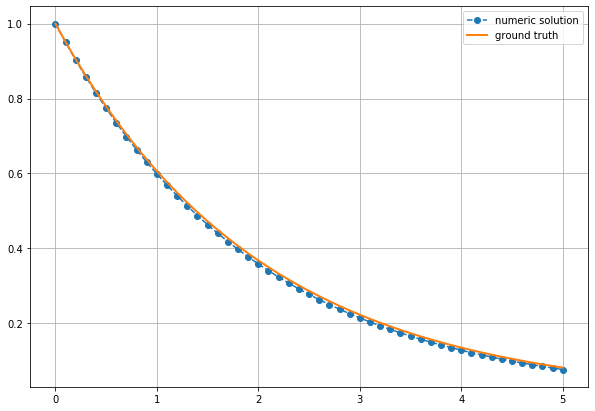

In [3]:
lam = -0.5
ttt = np.linspace(0, 5, 100)
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.figure(figsize=[10,7])
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

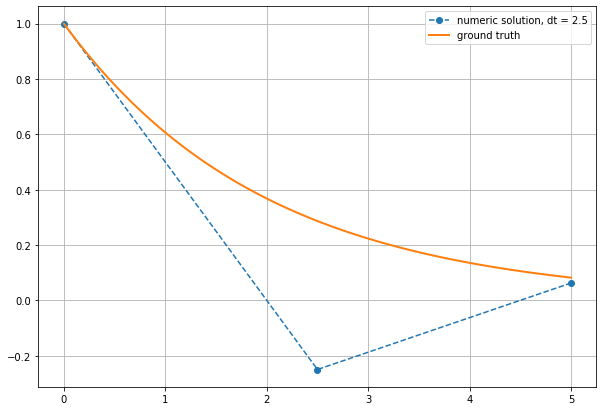

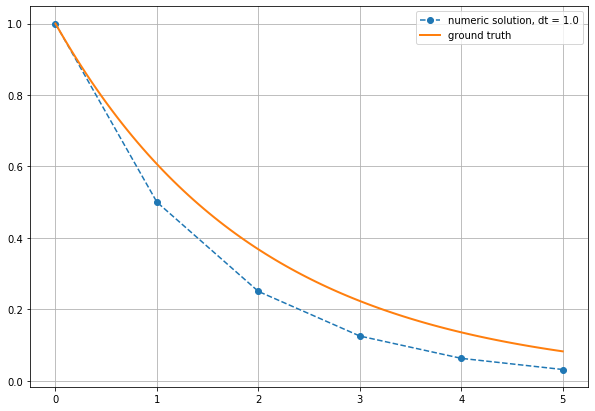

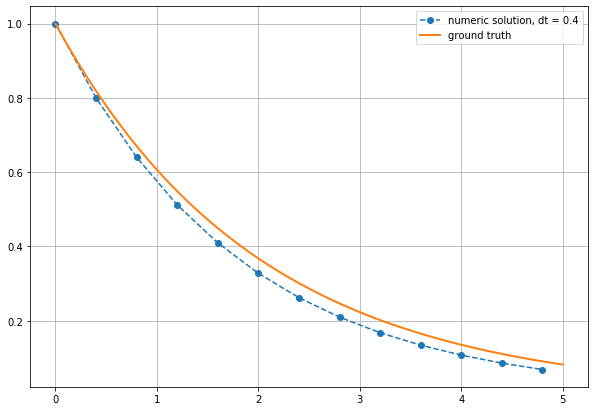

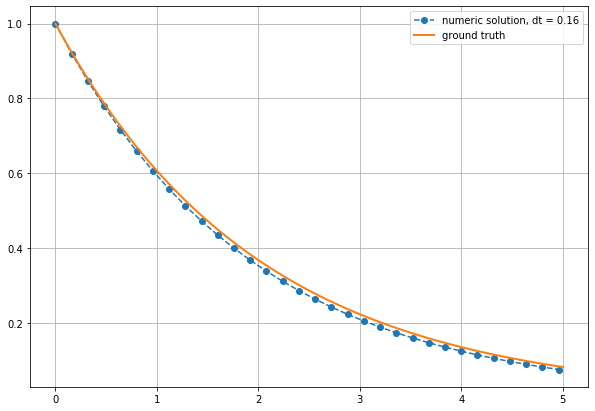

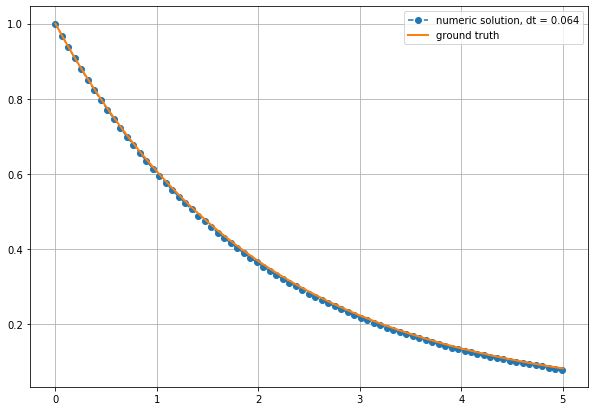

In [9]:
for i in range(5):
    plt.figure(figsize=[10,7])
    dt = 2.5**(-i+1)
    tt, y = euler_solve(lam, u0=1.0, T=5, dt=dt)
    plt.plot(tt, y, 'o--', label='numeric solution, dt = {}'.format(dt))
    plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
    plt.legend()
    plt.grid()
    plt.show()

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

$$
y[k+1] = \frac{y[k]}{1-\lambda dt}
$$  

In [5]:
def euler_solve_implicit(lam, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(0, num_steps):
        y[k+1] = y[k]/(1-dt*lam)
    return tt, y

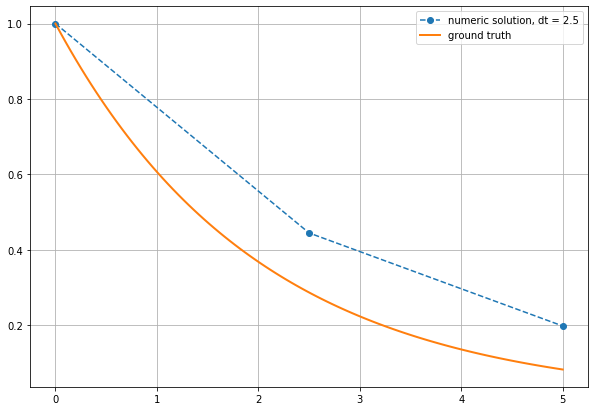

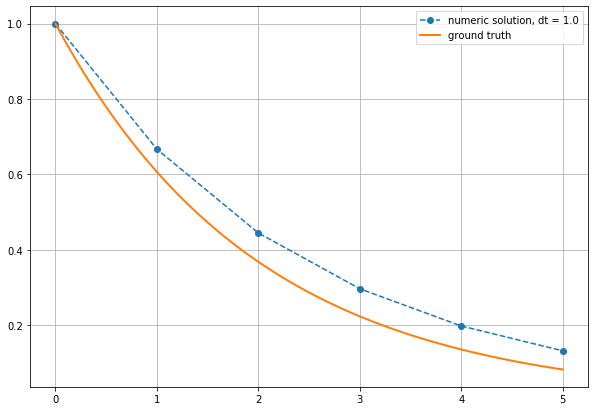

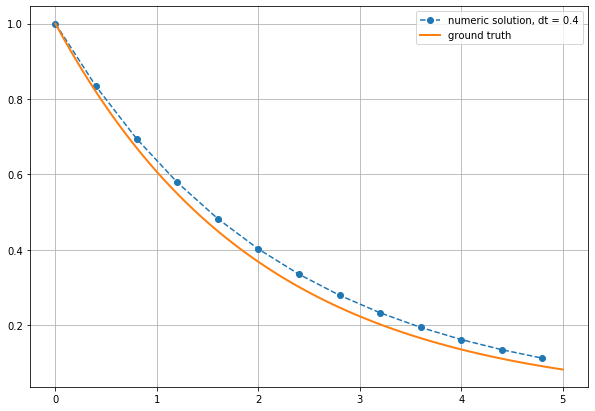

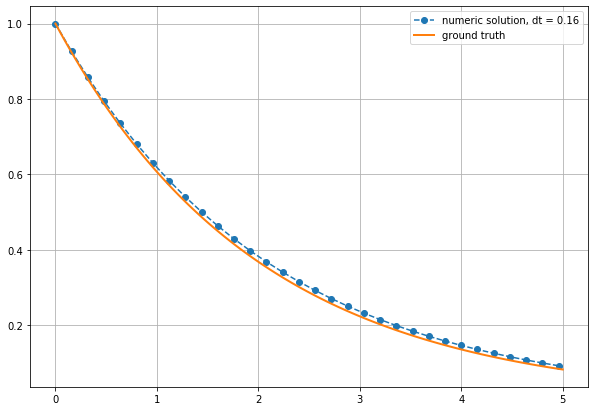

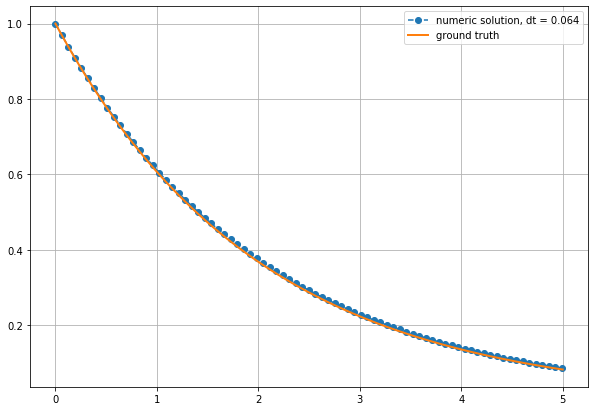

In [8]:
for i in range(5):
    plt.figure(figsize=[10,7])
    dt = 2.5**(-i+1)
    tt, y = euler_solve_implicit(lam, 1.0, 5, dt)
    plt.plot(tt, y, 'o--', label='numeric solution, dt = {}'.format(dt))
    plt.plot(ttt, np.exp(lam*ttt), '-', lw=2, label='ground truth')
    plt.legend()
    plt.grid()
    plt.show()

В целом методы похожи, не сказать, что один лучше другого

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [7]:
def euler_solve_system(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0,:] = u0
    for k in range(num_steps):
        y[k+1,:] = y[k, :] + dt * A@y[k,:]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [8]:
A = np.array([[-10.,10.],
              [32.,-499.]])

eigs = np.linalg.eigvals(A)
print("eigvals=", eigs)
print("coeff=",np.max(abs(eigs))/np.min(abs(eigs)))

tt, y = euler_solve_system(A, np.array([1,0]), 5., 0.01)
print("Max_val=", np.max(y))

eigvals= [  -9.34647667 -499.65352333]
coeff= 53.45902427704808
Max_val= 1.1345436754546553e+299


Видно, что разница собственных значений очень велика как и их отношение, поэтому считаем систему жёсткой.
К тому же, явный метод разошелся, что также доказывает жёсткость системы.

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [9]:
def euler_solve_system_implicit(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1, 2])
    y[0,:] = u0
    for k in range(num_steps):
        y[k+1,:] = np.linalg.solve((np.eye(2) - dt*A),y[k,:])
    return tt, y

In [10]:
tt1, y1 = euler_solve_system_implicit(A, np.array([1,0]), 5., 0.01)
print(np.max(y1))

1.0


Совсем другое дело, построим оба решения и `ground truth` к ним с помощью математики.

C:\Anaconda\envs\NN1\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Anaconda\envs\NN1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
C:\Anaconda\envs\NN1\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


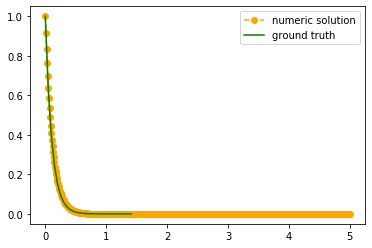

C:\Anaconda\envs\NN1\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
C:\Anaconda\envs\NN1\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


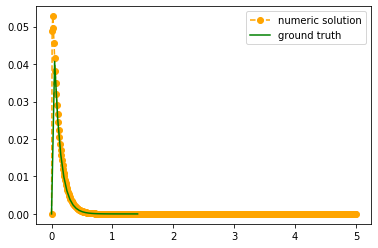

In [11]:
def u1(t):
    return (np.exp(-((509.*t)/2) - (np.sqrt(240401.)* t)/
  2) * (240401. - 489. * np.sqrt(240401.) + 240401.*np.exp(np.sqrt(240401.)* t) + 
   489. * np.sqrt(240401.) * np.exp(np.sqrt(240401.)* t)))/480802.
   

def u2(t):
    return (32.*np.exp(-((509.*t)/2) - (np.sqrt(240401.)* t)/
  2) *(-1. + np.exp(np.sqrt(240401.)* t)))/np.sqrt(240401.)

plt.plot(tt1, y1[:,0], 'o--', label='numeric solution', color='orange')
plt.plot(ttt, u1(ttt), color='g', label='ground truth')
plt.legend()
plt.show()
plt.plot(tt1, y1[:,1], 'o--', label='numeric solution', color='orange')
plt.plot(ttt, u2(ttt), color='g', label='ground truth')
plt.legend()

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

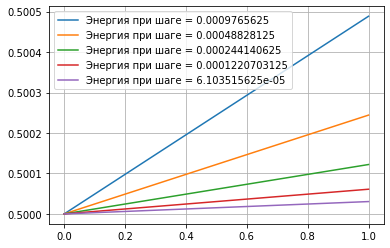

In [12]:
def system_ODE(w):
    return np.array([[0,-w**2],[1,0]])
w=1
for i in range(5):
    dt=2**(-i-10)
    t2, u2 = euler_solve_system(system_ODE(w), np.array([0.,1.]) , 1., dt)
    E = u2[:,1]**2/2+w**2*u2[:,0]**2/2
    plt.plot(t2, E, label = "Энергия при шаге = {}".format(dt))
plt.grid()
plt.legend()

Видно, что чем больше шаг, тем больше ошибка

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

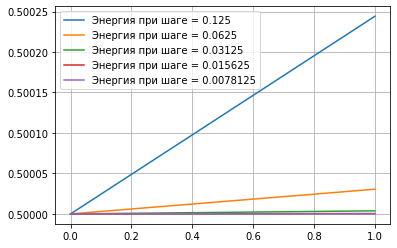

In [41]:
def RungeKutta(A, u0, T, dt):
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty([num_steps+1,2])
    y[0,:] = u0
    for k in range(num_steps):
        pred_step = y[k, :] + dt*A@y[k,:]/2
        y[k+1,:] = y[k, :] + dt*A@pred_step
    return tt, y

w=1
for i in range(5):
    dt=2**(-i-3)
    t2, u2 = RungeKutta(system_ODE(w), np.array([0.,1.]) , 1., dt)
    E = u2[:,1]**2/2+w**2*u2[:,0]**2/2
    plt.plot(t2, E, label = "Энергия при шаге = {}".format(dt))
plt.grid()
plt.legend()

Теперь просто уменьшаем шаг до посинения и наблюдаем что-то вроде квадратично убывающей ошибки

--- 120.01476550102234 seconds ---


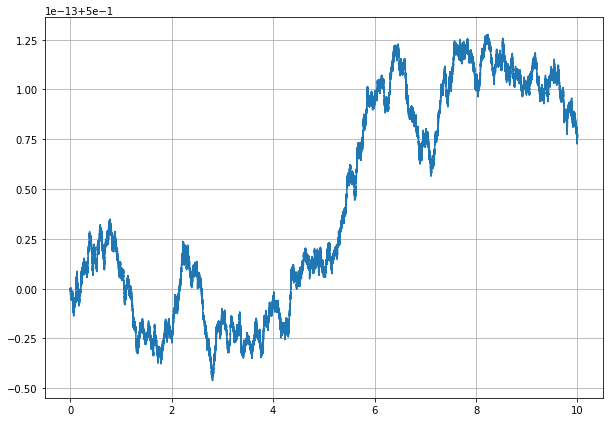

In [47]:
import time
start_time = time.time()
plt.figure(figsize=(10,7))
t3, u3 = RungeKutta(system_ODE(w), np.array([0.,1.]) , 10., 1e-6)
E = u3[:,1]**2/2+w**2*u3[:,0]**2/2
plt.plot(t3, E, label = "Энергия при шаге = {}".format(dt))
plt.grid()
print("--- %s seconds ---" % (time.time() - start_time))

На таком масштабе смотреть, конечно, больно, но уже видна отличная точность и постепенный рост ошибки от интервала